In [2]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0559
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - l

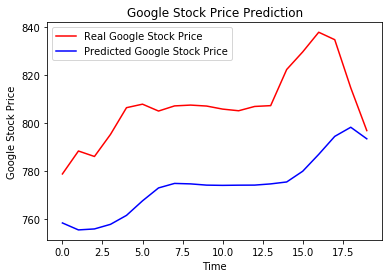

In [11]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [12]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0414
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0026
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0021
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0022
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0020
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0020
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0018
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0023
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0018
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - l

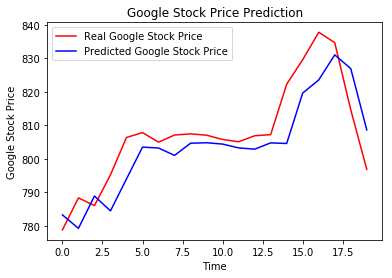

In [13]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [14]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 1000, batch_size = 32)

Epoch 1/1000
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0367
Epoch 2/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0024
Epoch 3/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0021
Epoch 4/1000
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0020
Epoch 5/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0020
Epoch 6/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0020
Epoch 7/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0019
Epoch 8/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0018
Epoch 9/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 10/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0020
Epoch 11/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 12/1000
1198/1198 [==============================] - 5s 

1198/1198 [==============================] - 5s 4ms/step - loss: 2.9554e-04
Epoch 184/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.8317e-04
Epoch 185/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.7895e-04
Epoch 186/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 3.8411e-04
Epoch 187/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 3.5581e-04
Epoch 188/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 3.5542e-04
Epoch 189/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 3.1132e-04
Epoch 190/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 3.2883e-04
Epoch 191/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.7342e-04
Epoch 192/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.9857e-04
Epoch 193/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 3.6532e-04
Epoch 194/1000

1198/1198 [==============================] - 5s 4ms/step - loss: 2.5450e-04
Epoch 364/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.9221e-04
Epoch 365/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.6053e-04
Epoch 366/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.5578e-04
Epoch 367/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.6353e-04
Epoch 368/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.5863e-04
Epoch 369/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.7677e-04
Epoch 370/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.9673e-04
Epoch 371/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.6178e-04
Epoch 372/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.5186e-04
Epoch 373/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.7810e-04
Epoch 374/1000

1198/1198 [==============================] - 7s 6ms/step - loss: 2.1925e-04
Epoch 544/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.3034e-04
Epoch 545/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.2400e-04
Epoch 546/1000
1198/1198 [==============================] - 5s 5ms/step - loss: 2.2307e-04
Epoch 547/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.1649e-04
Epoch 548/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.4109e-04
Epoch 549/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 2.2744e-04
Epoch 550/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 2.3876e-04
Epoch 551/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.2918e-04
Epoch 552/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 2.4224e-04
Epoch 553/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 2.2311e-04
Epoch 554/1000

1198/1198 [==============================] - 8s 6ms/step - loss: 2.2439e-04
Epoch 634/1000
1198/1198 [==============================] - 8s 7ms/step - loss: 2.3988e-04
Epoch 635/1000
1198/1198 [==============================] - 8s 6ms/step - loss: 2.2151e-04
Epoch 636/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 2.3954e-04
Epoch 637/1000
1198/1198 [==============================] - 8s 6ms/step - loss: 2.1120e-04
Epoch 638/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 2.0497e-04
Epoch 639/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.9765e-04
Epoch 640/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.9845e-04
Epoch 641/1000
1198/1198 [==============================] - 9s 8ms/step - loss: 2.1591e-04
Epoch 642/1000
1198/1198 [==============================] - 9s 8ms/step - loss: 2.0545e-04
Epoch 643/1000
1198/1198 [==============================] - 9s 8ms/step - loss: 2.2971e-04
Epoch 644/1000

1198/1198 [==============================] - 7s 6ms/step - loss: 1.8722e-04
Epoch 724/1000
1198/1198 [==============================] - 8s 6ms/step - loss: 1.7327e-04
Epoch 725/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.7584e-04
Epoch 726/1000
1198/1198 [==============================] - 9s 7ms/step - loss: 1.9182e-04
Epoch 727/1000
1198/1198 [==============================] - 8s 6ms/step - loss: 1.7400e-04
Epoch 728/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.7399e-04
Epoch 729/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.6650e-04
Epoch 730/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.7660e-04
Epoch 731/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.7772e-04
Epoch 732/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.7364e-04
Epoch 733/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.7036e-04
Epoch 734/1000

1198/1198 [==============================] - 6s 5ms/step - loss: 1.5574e-04
Epoch 814/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.5302e-04
Epoch 815/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.5848e-04
Epoch 816/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.4981e-04
Epoch 817/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.4109e-04
Epoch 818/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.5631e-04
Epoch 819/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.4634e-04
Epoch 820/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.5128e-04
Epoch 821/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.5472e-04
Epoch 822/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.5695e-04
Epoch 823/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.5456e-04
Epoch 824/1000

1198/1198 [==============================] - 6s 5ms/step - loss: 1.1402e-04
Epoch 904/1000
1198/1198 [==============================] - 8s 7ms/step - loss: 1.1609e-04
Epoch 905/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.0470e-04
Epoch 906/1000
1198/1198 [==============================] - 8s 7ms/step - loss: 1.2755e-04
Epoch 907/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.1725e-04
Epoch 908/1000
1198/1198 [==============================] - 6s 5ms/step - loss: 1.3280e-04
Epoch 909/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.4461e-04
Epoch 910/1000
1198/1198 [==============================] - 7s 5ms/step - loss: 1.1024e-04
Epoch 911/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.2613e-04
Epoch 912/1000
1198/1198 [==============================] - 7s 5ms/step - loss: 1.2400e-04
Epoch 913/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 1.1612e-04
Epoch 914/1000

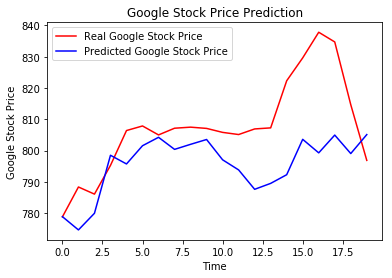

In [15]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 1000, batch_size = 32)

Epoch 1/1000
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0499
Epoch 2/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0064
Epoch 3/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 4/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 5/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 6/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 7/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 8/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 9/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 10/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 11/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 12/1000
1198/1198 [==============================] - 5s 4

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 191/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.6294e-04
Epoch 192/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0011
Epoch 193/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 194/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 195/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 196/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.9973e-04
Epoch 197/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 198/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.8075e-04
Epoch 199/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 200/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.2361e-04
Epoch 201/1000
1198/1198 [================

1198/1198 [==============================] - 5s 4ms/step - loss: 9.0834e-04
Epoch 283/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 284/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.9697e-04
Epoch 285/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 286/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.0363e-04
Epoch 287/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.1037e-04
Epoch 288/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 289/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.1663e-04
Epoch 290/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.9983e-04
Epoch 291/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 292/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.6323e-04
Epoch 293/1000
1198/1198 [====

1198/1198 [==============================] - 5s 4ms/step - loss: 9.0403e-04
Epoch 374/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.4216e-04
Epoch 375/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.2629e-04
Epoch 376/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.9129e-04
Epoch 377/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.5497e-04
Epoch 378/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.8310e-04
Epoch 379/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.7523e-04
Epoch 380/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.4215e-04
Epoch 381/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 9.3474e-04
Epoch 382/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.5189e-04
Epoch 383/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 384/1000
119

1198/1198 [==============================] - 5s 4ms/step - loss: 7.8951e-04
Epoch 554/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.2457e-04
Epoch 555/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.4498e-04
Epoch 556/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.4711e-04
Epoch 557/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.0747e-04
Epoch 558/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.5926e-04
Epoch 559/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.4204e-04
Epoch 560/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.6175e-04
Epoch 561/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.4413e-04
Epoch 562/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.1799e-04
Epoch 563/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.0518e-04
Epoch 564/1000

1198/1198 [==============================] - 5s 4ms/step - loss: 9.2882e-04
Epoch 734/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.8557e-04
Epoch 735/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.5598e-04
Epoch 736/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.9122e-04
Epoch 737/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.7214e-04
Epoch 738/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.4860e-04
Epoch 739/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.3190e-04
Epoch 740/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.5092e-04
Epoch 741/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.1118e-04
Epoch 742/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.3320e-04
Epoch 743/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.3638e-04
Epoch 744/1000

1198/1198 [==============================] - 5s 4ms/step - loss: 6.9745e-04
Epoch 914/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.7294e-04
Epoch 915/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.8124e-04
Epoch 916/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.0453e-04
Epoch 917/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.8326e-04
Epoch 918/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.8172e-04
Epoch 919/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.2763e-04
Epoch 920/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.6475e-04
Epoch 921/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.0690e-04
Epoch 922/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 7.2457e-04
Epoch 923/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 8.0899e-04
Epoch 924/1000

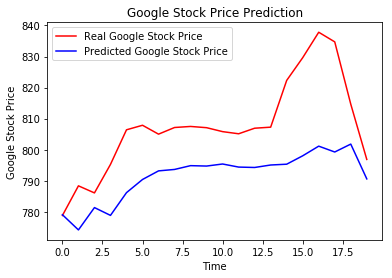

In [8]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [16]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0496
Epoch 2/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 12/100
1198/1198 [==============================] - 5s 5ms/step - l

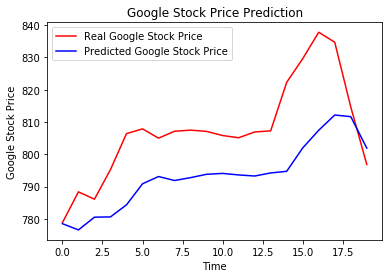

In [17]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [18]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 1000, batch_size = 32)

Epoch 1/1000
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0363
Epoch 2/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 3/1000
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0050
Epoch 4/1000
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 5/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 6/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 7/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0038
Epoch 8/1000
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0037
Epoch 9/1000
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0039
Epoch 10/1000
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0040
Epoch 11/1000
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0033
Epoch 12/1000
1198/1198 [==============================] - 4s 

1198/1198 [==============================] - 4s 3ms/step - loss: 8.4947e-04
Epoch 190/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 9.9341e-04
Epoch 191/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 9.2094e-04
Epoch 192/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 9.6229e-04
Epoch 193/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 9.9127e-04
Epoch 194/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 195/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 9.1595e-04
Epoch 196/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 9.2773e-04
Epoch 197/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 9.3935e-04
Epoch 198/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 9.5811e-04
Epoch 199/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 9.2297e-04
Epoch 200/1000
119

1198/1198 [==============================] - 4s 3ms/step - loss: 7.7586e-04
Epoch 370/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.9781e-04
Epoch 371/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.7473e-04
Epoch 372/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 8.6200e-04
Epoch 373/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 8.2129e-04
Epoch 374/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 8.1933e-04
Epoch 375/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.6610e-04
Epoch 376/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 8.7016e-04
Epoch 377/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.7615e-04
Epoch 378/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 8.3939e-04
Epoch 379/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.9159e-04
Epoch 380/1000

1198/1198 [==============================] - 4s 3ms/step - loss: 7.8698e-04
Epoch 550/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 8.6155e-04
Epoch 551/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.5727e-04
Epoch 552/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.4857e-04
Epoch 553/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.6624e-04
Epoch 554/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.6233e-04
Epoch 555/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.5911e-04
Epoch 556/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.3318e-04
Epoch 557/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.4144e-04
Epoch 558/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 8.1237e-04
Epoch 559/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.8613e-04
Epoch 560/1000

1198/1198 [==============================] - 4s 3ms/step - loss: 7.0030e-04
Epoch 730/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 8.0057e-04
Epoch 731/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.2004e-04
Epoch 732/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 8.1714e-04
Epoch 733/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.4921e-04
Epoch 734/1000
1198/1198 [==============================] - 4s 4ms/step - loss: 6.7345e-04
Epoch 735/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.7348e-04
Epoch 736/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.4024e-04
Epoch 737/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.7063e-04
Epoch 738/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.3132e-04
Epoch 739/1000
1198/1198 [==============================] - 4s 4ms/step - loss: 8.2723e-04
Epoch 740/1000

1198/1198 [==============================] - 4s 3ms/step - loss: 7.5297e-04
Epoch 910/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 6.9588e-04
Epoch 911/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.2659e-04
Epoch 912/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.5084e-04
Epoch 913/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 6.6198e-04
Epoch 914/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 6.8057e-04
Epoch 915/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.4140e-04
Epoch 916/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.5504e-04
Epoch 917/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 7.3673e-04
Epoch 918/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 6.8185e-04
Epoch 919/1000
1198/1198 [==============================] - 4s 3ms/step - loss: 6.5241e-04
Epoch 920/1000

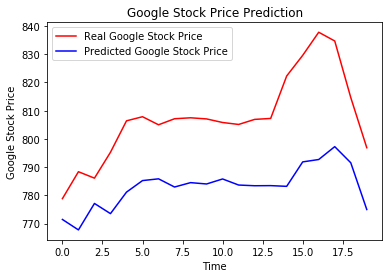

In [19]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [3]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 50))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0345
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0039
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 4/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0034
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0029
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0026
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 10/

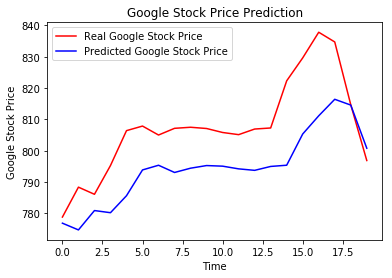

In [4]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [5]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0247
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0026
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0021
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0022
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0022
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

Epoch 95/100
1198/1198 [==============================] - 6s 5ms/step - loss: 6.3026e-04
Epoch 96/100
1198/1198 [==============================] - 6s 5ms/step - loss: 7.3706e-04
Epoch 97/100
1198/1198 [==============================] - 6s 5ms/step - loss: 6.4996e-04
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 8.4411e-04
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 7.3662e-04
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 7.0684e-04


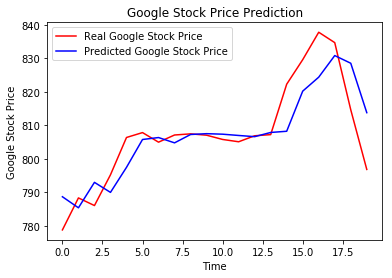

In [6]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adadelta', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0282
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0081
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0063
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0084
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0058
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0057
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0026
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

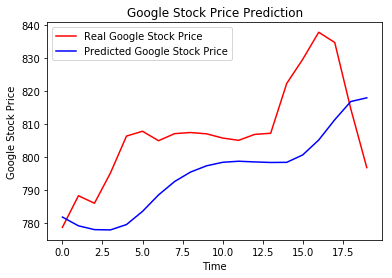

In [8]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [9]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'sgd', loss = 'mean_squared_error',metrics=['accuracy'])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0775 - acc: 0.0017
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0348 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0222 - acc: 0.0017
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0135 - acc: 0.0017
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0074 - acc: 0.0017
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0031 - acc: 0.0017
Epoch 8/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0026 - acc: 0.0017
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0024 - acc: 0.0017
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0024 - acc: 0.0017
Epoch 11/100
1198/

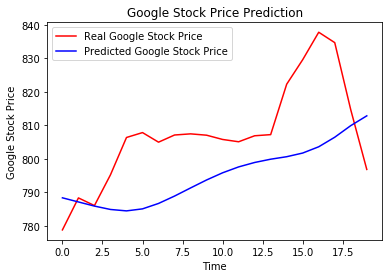

In [10]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0429 - acc: 8.3472e-04
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0056 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0022 - acc: 0.0017
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0021 - acc: 0.0017
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0019 - acc: 0.0017
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0020 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0021 - acc: 0.0017
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0019 - acc: 0.0017
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0018 - acc: 0.0017
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0018 - acc: 0.0017
Epoch 11/100
11

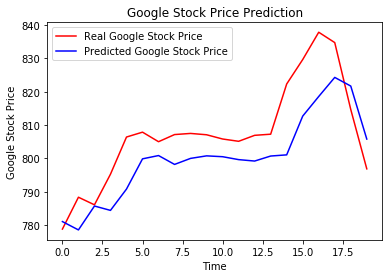

In [12]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()